In [ ]:
## Sources
# https://zenodo.org/record/7636699#.ZC8xt_ZBw2w
# https://www.nature.com/articles/s41597-023-02041-1#Bib1

In [1]:
import pandas as pd

df = pd.read_csv('EMISSIONS_ANNUAL_1830-2021.csv')
df.head()

,CNTR_NAME,ISO3,Gas,Component,Year,Data,Unit
0,Afghanistan,AFG,CH[4],Fossil,1830,0.018746,Tg~CH[4]~year^-1
1,Afghanistan,AFG,CH[4],Fossil,1831,0.018850,Tg~CH[4]~year^-1
2,Afghanistan,AFG,CH[4],Fossil,1832,0.018953,Tg~CH[4]~year^-1
3,Afghanistan,AFG,CH[4],Fossil,1833,0.019057,Tg~CH[4]~year^-1
4,Afghanistan,AFG,CH[4],Fossil,1834,0.019161,Tg~CH[4]~year^-1


In [2]:
# Renommer la colonne 'CNTR_NAME'

df = df.rename(columns={"CNTR_NAME": "Country"})
df.head()

,Country,ISO3,Gas,Component,Year,Data,Unit
0,Afghanistan,AFG,CH[4],Fossil,1830,0.018746,Tg~CH[4]~year^-1
1,Afghanistan,AFG,CH[4],Fossil,1831,0.018850,Tg~CH[4]~year^-1
2,Afghanistan,AFG,CH[4],Fossil,1832,0.018953,Tg~CH[4]~year^-1
3,Afghanistan,AFG,CH[4],Fossil,1833,0.019057,Tg~CH[4]~year^-1
4,Afghanistan,AFG,CH[4],Fossil,1834,0.019161,Tg~CH[4]~year^-1


In [3]:
# Creation d'un DataFrame df_global (données mondiales)
df_global = df.loc[df['Country'] == 'GLOBAL']
display(df_global)

,Country,ISO3,Gas,Component,Year,Data,Unit
130192,GLOBAL,GLOBAL,CH[4],Fossil,1830,12.430163,Tg~CH[4]~year^-1
130193,GLOBAL,GLOBAL,CH[4],Fossil,1831,12.496028,Tg~CH[4]~year^-1
130194,GLOBAL,GLOBAL,CH[4],Fossil,1832,12.590840,Tg~CH[4]~year^-1
130195,GLOBAL,GLOBAL,CH[4],Fossil,1833,12.689020,Tg~CH[4]~year^-1
130196,GLOBAL,GLOBAL,CH[4],Fossil,1834,12.794750,Tg~CH[4]~year^-1
...,...,...,...,...,...,...,...
131895,GLOBAL,GLOBAL,N[2]*O,Total,2017,10.532110,Tg~N[2]*O~year^-1
131896,GLOBAL,GLOBAL,N[2]*O,Total,2018,10.513480,Tg~N[2]*O~year^-1
131897,GLOBAL,GLOBAL,N[2]*O,Total,2019,10.569781,Tg~N[2]*O~year^-1
131898,GLOBAL,GLOBAL,N[2]*O,Total,2020,10.686005,Tg~N[2]*O~year^-1


In [4]:
display(df.loc[(df['Country'] == 'GLOBAL') & (df_global['Year'] == 1830)])

,Country,ISO3,Gas,Component,Year,Data,Unit
130192,GLOBAL,GLOBAL,CH[4],Fossil,1830,12.430163,Tg~CH[4]~year^-1
130384,GLOBAL,GLOBAL,CH[4],LULUCF,1830,26.274916,Tg~CH[4]~year^-1
130576,GLOBAL,GLOBAL,CH[4],Total,1830,38.705079,Tg~CH[4]~year^-1
130768,GLOBAL,GLOBAL,CO[2],Fossil,1830,0.089123,Pg~CO[2]~year^-1
131132,GLOBAL,GLOBAL,CO[2],Total,1830,0.089123,Pg~CO[2]~year^-1
131324,GLOBAL,GLOBAL,N[2]*O,Fossil,1830,0.130835,Tg~N[2]*O~year^-1
131516,GLOBAL,GLOBAL,N[2]*O,LULUCF,1830,0.233108,Tg~N[2]*O~year^-1
131708,GLOBAL,GLOBAL,N[2]*O,Total,1830,0.363944,Tg~N[2]*O~year^-1


In [ ]:
# Chaque gaz provient de sources différentes (colonne "Component")
# Pour notre étude, nous allons nous intéresser uniquement à la quantité globale.

In [5]:
# Regroupement des données par gaz et par année

dfg_final = df_global.groupby(['Gas', 'Year']).sum()
display(dfg_final)

Data
Gas    Year           
CH[4]  1830  77.410158
       1831  77.900279
       1832  78.448294
       1833  79.003045
       1834  79.572896
...                ...
N[2]*O 2017  21.064220
       2018  21.026960
       2019  21.139563
       2020  21.372010
       2021  21.744623

[576 rows x 1 columns]

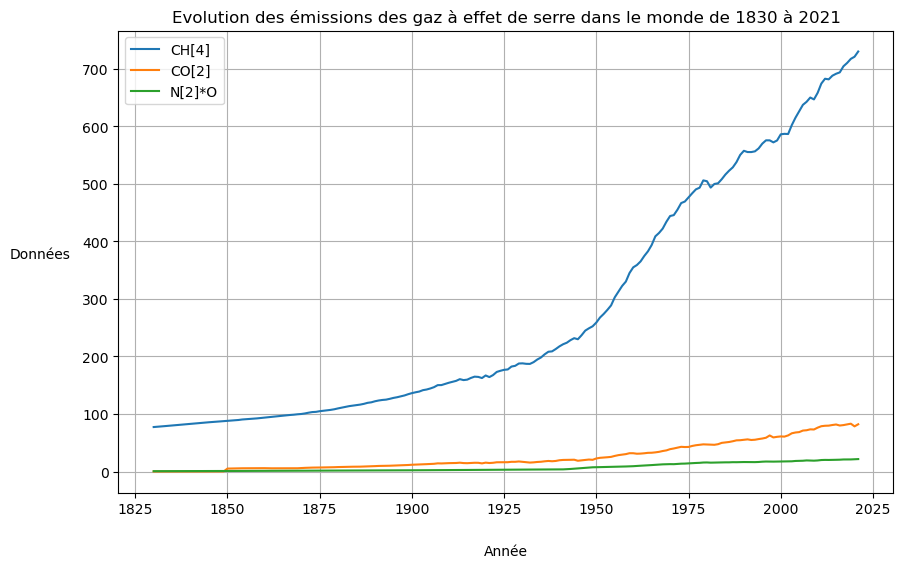

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))

sns.lineplot(x='Year', y='Data', hue='Gas', data= dfg_final)

plt.ylabel("Données", rotation = 0, labelpad = 30)
plt.xlabel('Année', labelpad = 20)
plt.grid()
plt.legend(loc = 'upper left')
plt.title("Evolution des émissions des gaz à effet de serre dans le monde de 1830 à 2021")

plt.show();

In [ ]:
# Commentaire : On observe une nette évolution des émissions de méthane au cours du dernier siècle. 

In [ ]:
# Units 
# 1 Tg = 1 million tons
# 1 Pg = 1 billion tons = 1000 millions tons

In [7]:
# Mise à l'echelle - Application d'un facteur 1000 aux données relatives au CO2

df_global.loc[df_global['Gas'] == 'CO[2]', 'Data'] = df_global.loc[df_global['Gas'] == 'CO[2]', 'Data'].apply(lambda x: x*1000)
df_global.head()

,Country,ISO3,Gas,Component,Year,Data,Unit
130192,GLOBAL,GLOBAL,CH[4],Fossil,1830,12.430163,Tg~CH[4]~year^-1
130193,GLOBAL,GLOBAL,CH[4],Fossil,1831,12.496028,Tg~CH[4]~year^-1
130194,GLOBAL,GLOBAL,CH[4],Fossil,1832,12.590840,Tg~CH[4]~year^-1
130195,GLOBAL,GLOBAL,CH[4],Fossil,1833,12.689020,Tg~CH[4]~year^-1
130196,GLOBAL,GLOBAL,CH[4],Fossil,1834,12.794750,Tg~CH[4]~year^-1


In [8]:
# Regroupement des données par gaz et par année

dfg_final_2 = df_global.groupby(['Gas', 'Year']).sum()
display(dfg_final_2)

Data
Gas    Year           
CH[4]  1830  77.410158
       1831  77.900279
       1832  78.448294
       1833  79.003045
       1834  79.572896
...                ...
N[2]*O 2017  21.064220
       2018  21.026960
       2019  21.139563
       2020  21.372010
       2021  21.744623

[576 rows x 1 columns]

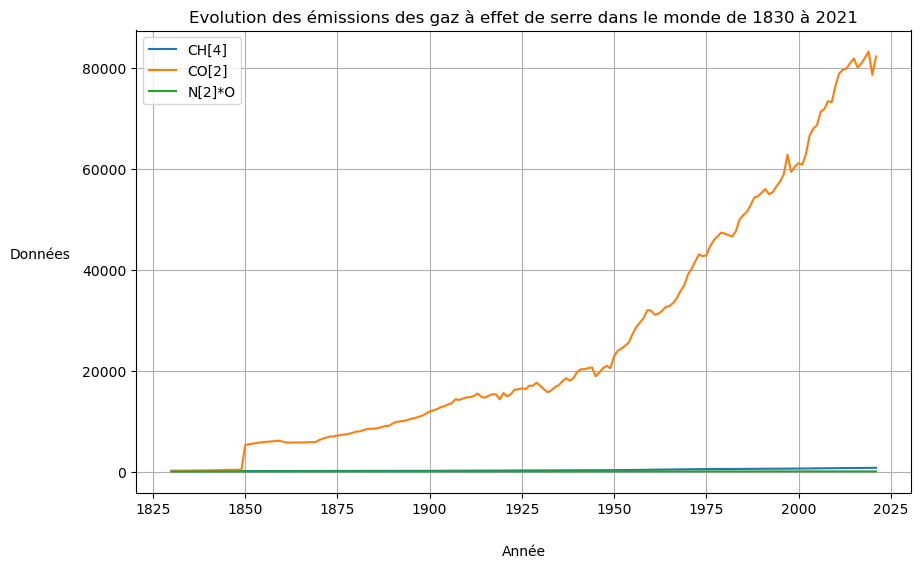

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))

sns.lineplot(x='Year', y='Data', hue='Gas', data= dfg_final_2)

plt.ylabel("Données", rotation = 0, labelpad = 30)
plt.xlabel('Année', labelpad = 20)
plt.grid()
plt.legend(loc = 'upper left')
plt.title("Evolution des émissions des gaz à effet de serre dans le monde de 1830 à 2021")

plt.show();

In [ ]:
# Commentaires : Les émissions de gaz à effet de serre sont majoritairement du dioxyde de carbone.

In [10]:
# Comparaison avec l'évolution des températures dans le monde

import pandas as pd
import numpy as np

df_temp = pd.read_csv('ZonAnn.Ts+dSST_Zonal_annual_means.csv')
df_temp.head()

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.17,-0.29,-0.04,-0.37,-0.12,-0.02,-0.80,-0.48,-0.29,-0.16,-0.09,-0.04,0.05,0.66
1,1881,-0.08,-0.18,0.01,-0.35,0.11,-0.07,-0.91,-0.43,-0.21,0.09,0.12,-0.05,-0.07,0.58
2,1882,-0.11,-0.22,-0.01,-0.31,-0.04,0.01,-1.41,-0.26,-0.17,-0.06,-0.03,0.01,0.04,0.61
3,1883,-0.17,-0.29,-0.06,-0.35,-0.16,-0.01,-0.19,-0.54,-0.28,-0.18,-0.14,-0.04,0.07,0.49
4,1884,-0.28,-0.43,-0.14,-0.60,-0.14,-0.14,-1.30,-0.62,-0.48,-0.13,-0.15,-0.19,-0.02,0.64


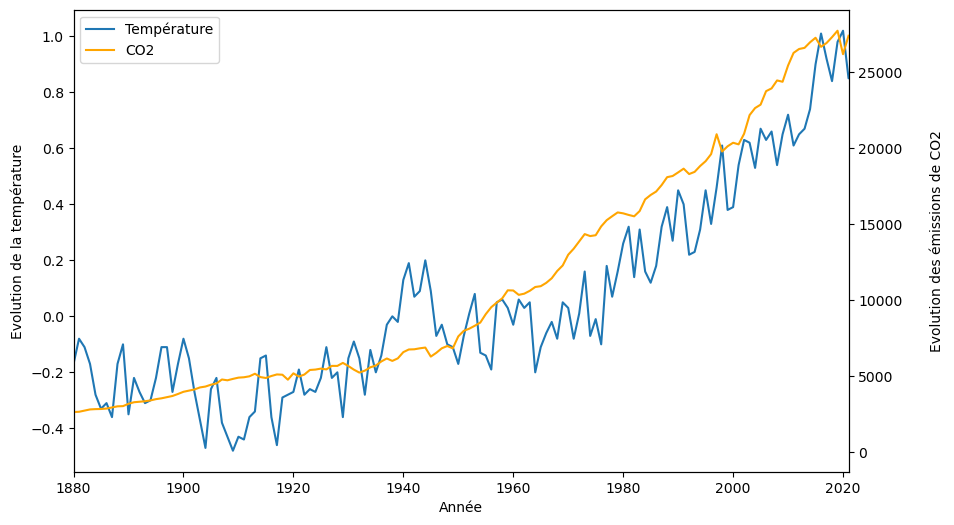

In [11]:
# Graphique - Evolution des températures et des émissions de CO2

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)

sns.lineplot(x='Year', y='Glob', data= df_temp, label="Température", ax = ax1)
ax1.set_ylabel('Evolution de la température')
ax1.set_xlim(1880, 2021)

ax2 = ax1.twinx()   
sns.lineplot(x='Year', y='Data', data= df_global.loc[df_global['Gas'] == 'CO[2]'], ci = None, color = 'orange', 
             label="CO2", ax=ax2)
ax2.set_ylabel('Evolution des émissions de CO2', labelpad = 20)

ax1.set_xlabel('Année')

ax1.legend_.remove()
ax2.legend_.remove()
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.show();

In [ ]:
# Commentaire : On observe bien une corrélation entre la hausse des températures dans le monde et l'augmentation de 
# la concentration de CO2 dans l’atmosphère.

In [27]:
# "Le potentiel de réchauffement global (GWP en anglais) est le pouvoir réchauffant d'un gaz, rapporté au pouvoir réchauffant 
# de la même masse de dioxyde de carbone. C'est un facteur de conversion utilisé pour comparer les impacts relatifs de 
# différents gaz à effet de serre sur le réchauffement climatique en se fondant sur leur forçage radiatif cumulé sur une 
# période donnée."

# Les estimations généralement utilisées sont les suivantes :
## dioxyde de carbone, CO2 : 1
## méthane (CH4) : 27,9
## protoxyde d'azote (N2O) : 273

# La période la plus fréquemment utilisée est celle de 100 ans. 

## Source : GIEC, Sixième rapport d'évaluation (AR6) 
# https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter_07_Supplementary_Material.pdf

In [12]:
# Application du GWP(100) sur le CH4 :
df_global.loc[df_global['Gas'] == 'CH[4]', 'Data'] = df_global.loc[df_global['Gas'] == 'CH[4]', 'Data'].apply(lambda x: x*27.9)

# Application du GWP(100) sur le N2O :
df_global.loc[df_global['Gas'] == 'N[2]*O', 'Data'] = df_global.loc[df_global['Gas'] == 'N[2]*O', 'Data'].apply(lambda x: x*273)

dfg_final_3 = df_global.groupby(['Gas', 'Year']).sum()
display(dfg_final_3)

Data
Gas    Year             
CH[4]  1830  2159.743408
       1831  2173.417788
       1832  2188.707391
       1833  2204.184953
       1834  2220.083795
...                  ...
N[2]*O 2017  5750.532056
       2018  5740.360131
       2019  5771.100648
       2020  5834.558660
       2021  5936.282139

[576 rows x 1 columns]

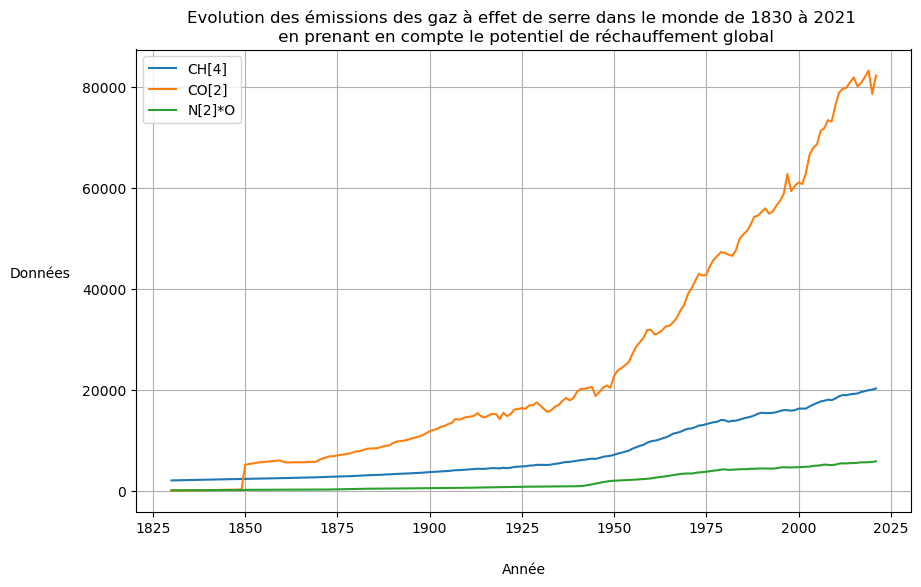

In [13]:
plt.figure(figsize=(10,6))

sns.lineplot(x='Year', y='Data', hue='Gas', data= dfg_final_3)

plt.ylabel("Données", rotation = 0, labelpad = 30)
plt.xlabel('Année', labelpad = 20)
plt.grid()
plt.legend(loc = 'upper left')
plt.title("Evolution des émissions des gaz à effet de serre dans le monde de 1830 à 2021 \n en prenant en compte le potentiel de réchauffement global")

plt.show();

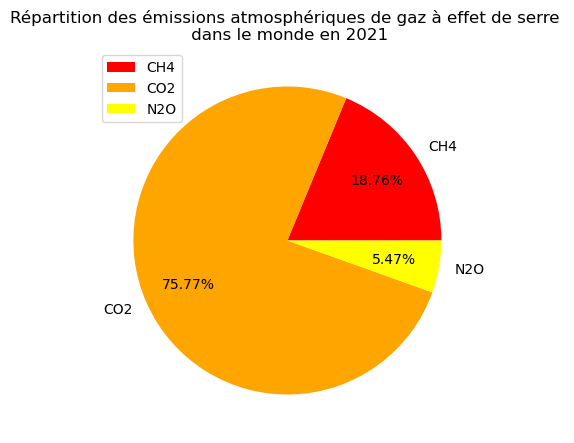

In [14]:
# Répartition des émissions atmosphériques de gaz à effet de serre dans le monde en 2021
# (en prenant en compte le PRG)

plt.figure(figsize = (5, 5))
df_2021 = df_global.loc[(df_global['Year'] == 2021)]
df_g_2021 = df_2021.groupby(['Gas']).sum()

plt.pie(x = df_g_2021.Data, labels = ['CH4', 'CO2', 'N2O'], colors = ['red', 'orange', 'yellow'], 
autopct = lambda x: str(round(x, 2)) + '%', pctdistance = 0.7, labeldistance = 1.1)

plt.title("Répartition des émissions atmosphériques de gaz à effet de serre \n dans le monde en 2021")
plt.legend();